In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for label encoding
from sklearn import preprocessing

# SVM model
from sklearn.svm import SVC

# Grid Search (to find best hyperparameters)
from sklearn.model_selection import (GridSearchCV, 
                                    ShuffleSplit, 
                                    cross_val_score)

# for evaluation
from sklearn.metrics import (accuracy_score, 
                            precision_score, 
                            recall_score, 
                            f1_score, 
                            plot_confusion_matrix, 
                            confusion_matrix, 
                            mean_squared_error, 
                            roc_curve)

In [2]:
df_train = pd.read_csv('df_train.data')
df_test = pd.read_csv('df_test.data')

display('train dataset', df_train, 'test dataset', df_test)

'train dataset'

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,lettr
0,0.200,0.267,0.267,0.400,0.400,0.533,0.600,0.333,0.000,0.533,0.400,0.400,0.333,0.600,0.333,0.533,P
1,0.267,0.600,0.333,0.467,0.267,0.333,0.467,0.400,0.333,0.600,0.533,0.667,0.133,0.533,0.267,0.600,G
2,0.333,0.600,0.333,0.400,0.133,0.267,0.467,0.600,0.133,0.467,0.333,0.733,0.267,0.533,0.133,0.733,K
3,0.200,0.333,0.333,0.467,0.333,0.600,0.667,0.200,0.067,0.533,0.400,0.467,0.200,0.667,0.533,0.400,H
4,0.267,0.467,0.267,0.333,0.267,0.467,0.533,0.333,0.600,0.467,0.467,0.600,0.067,0.600,0.467,0.533,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13969,0.067,0.467,0.133,0.333,0.067,0.867,0.200,0.467,0.267,0.867,0.200,0.733,0.000,0.400,0.000,0.533,J
13970,0.133,0.200,0.200,0.133,0.133,0.533,0.467,0.133,0.333,0.667,0.333,0.467,0.133,0.533,0.200,0.600,B
13971,0.200,0.067,0.267,0.200,0.200,0.533,0.400,0.400,0.267,0.467,0.467,0.533,0.467,0.400,0.133,0.467,M
13972,0.133,0.267,0.200,0.200,0.133,0.400,0.467,0.400,0.400,0.400,0.400,0.733,0.133,0.600,0.267,0.600,G


'test dataset'

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,lettr
0,0.231,0.467,0.357,0.333,0.133,0.533,0.400,0.467,0.533,0.400,0.333,0.643,0.067,0.500,0.400,0.733,G
1,0.231,0.400,0.357,0.267,0.333,0.533,0.400,0.333,0.133,0.467,0.400,0.500,0.467,0.571,0.200,0.600,O
2,0.231,0.467,0.286,0.467,0.200,0.467,0.400,0.533,0.333,0.333,0.400,0.500,0.200,0.500,0.333,0.600,Q
3,0.231,0.267,0.357,0.200,0.133,0.467,0.533,0.133,0.533,0.733,0.400,0.571,0.133,0.500,0.267,0.533,E
4,0.462,0.600,0.643,0.467,0.267,0.467,0.667,0.133,0.533,0.933,0.400,0.143,0.067,0.643,0.200,0.533,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,0.462,0.667,0.571,0.533,0.600,0.467,0.400,0.400,0.267,0.533,0.467,0.500,0.267,0.643,0.533,0.733,F
5986,0.385,0.667,0.500,0.533,0.267,0.667,0.467,0.200,0.400,0.800,0.200,0.214,0.133,0.571,0.200,0.600,P
5987,0.077,0.000,0.143,0.000,0.000,0.467,0.467,0.200,0.667,0.533,0.400,0.500,0.000,0.500,0.400,0.533,Z
5988,0.154,0.267,0.286,0.200,0.133,0.400,0.467,0.400,0.400,0.400,0.400,0.643,0.133,0.500,0.267,0.600,G


### Create our train test input(X), real_output(Y)

In [3]:
X_train = df_train.loc[:, 'x-box':'yegvx']
Y_train = df_train[['lettr']]

X_test = df_test.loc[:, 'x-box':'yegvx']
Y_test = df_test[['lettr']]


# convert class labels to int (so can calc MSE (it only takes int not str))

le = preprocessing.LabelEncoder()
le.fit(df_train['lettr'])
# list(le.classes_)

Y_train = le.transform(df_train['lettr'])
Y_test = le.transform(df_test['lettr'])
# display(pd.concat([df_train[['lettr']], Y_train], axis=1))
# display(pd.concat([df_test[['lettr']], Y_test], axis=1))

In [4]:
def measure_error(y_true, y_pred, average, label='empty'):
    '''
    A function to return the specified error metrics for a given label
    '''
    return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average=average),
                      'recall': recall_score(y_true, y_pred, average=average),
                      'f1': f1_score(y_true, y_pred, average=average),
                      'MSE': mean_squared_error(y_true, y_pred)},
#                      },
                      name=label)

def residual_scatter(y_real, y_pred):
    '''
    plot actual (real) vs predicted residual
    '''
    sns.set_context('notebook')
    sns.set_style('white')
    fig = plt.figure(figsize=(6,6))
    ax = plt.axes()

    ph_test_predict = pd.DataFrame({'actual':y_real,
                                    'predict': y_pred}).set_index('actual').sort_index()

    ph_test_predict.plot(marker='o', ls='', ax=ax)
    ax.set(xlabel='Actual', ylabel='Predict', xlim=(0,35), ylim=(0,35));
    
    
def confusion_matrix_plotter(model, x_input, y_output_real, labels):
    '''
    plot confusion matrix for the specified model, given input, real_output and lables
    '''
    fig, ax = plt.subplots(figsize=(30, 30))
    
    disp = plot_confusion_matrix(model, x_input, y_output_real,
                                     display_labels= labels.value_counts().sort_index().index.map(lambda x: x[0]),
                                     cmap=plt.cm.Blues,
                                     normalize='true',
                                     ax=ax)

    disp.ax_.set_title('Confusion matrix, with normalization')

    plt.show()
    
def evaluation_metrics(model):
    '''
    return a table of the specifed evaluation metrics for a multi-class problem
    '''
    df_list_error = []
    for X, Y in [(X_train, Y_train), (X_test, Y_test)]:
        y_real = Y
        y_predict = model.predict(X)

        # create common error metrics (for multi-class classification)
        test_error = {}
        for average in ['micro', 'macro', 'weighted']:
            test_error[average] = measure_error(y_real, y_predict, average)

        df_list_error.append(pd.DataFrame(test_error))

        #plot residual
        residual_scatter(y_real, y_predict)

    dtc_error_1 = pd.concat([df_list_error[0], df_list_error[1]], keys=['train set', 'test set'])
    display(dtc_error_1)

def cross_val(model, x_input, y_output_real):
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    return cross_val_score(model, x_input, y_output_real, cv=cv)

### train the model

In [5]:
svc = SVC(random_state=12)

# use cross-validation to fine tune hyperparameters
cross_score = cross_val(svc, X_train, Y_train)

print(f"{'-' * 50}\n{cross_score.mean(): 0.2f} accuracy with a standard deviation of {cross_score.std(): 0.2f}")

--------------------------------------------------
 0.90 accuracy with a standard deviation of  0.00


In [6]:
svc = svc.fit(X_train, Y_train)

display(svc.get_params())

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 12,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Predict & Validate our model

micro     macro  weighted
train set accuracy   0.927866  0.927866  0.927866
          precision  0.927866  0.930004  0.930346
          recall     0.927866  0.927668  0.927866
          f1         0.927866  0.928052  0.928320
          MSE        7.094604  7.094604  7.094604
test set  accuracy   0.900668  0.900668  0.900668
          precision  0.900668  0.905481  0.905624
          recall     0.900668  0.899642  0.900668
          f1         0.900668  0.901033  0.901596
          MSE        9.369783  9.369783  9.369783

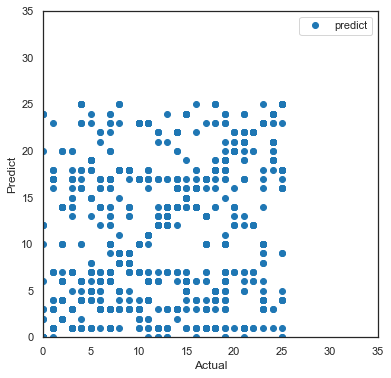

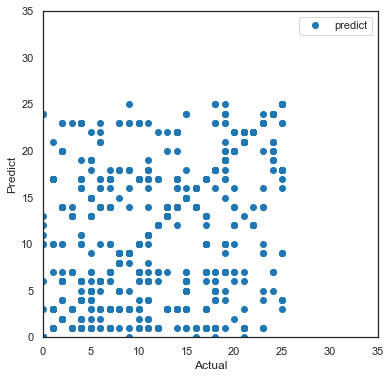

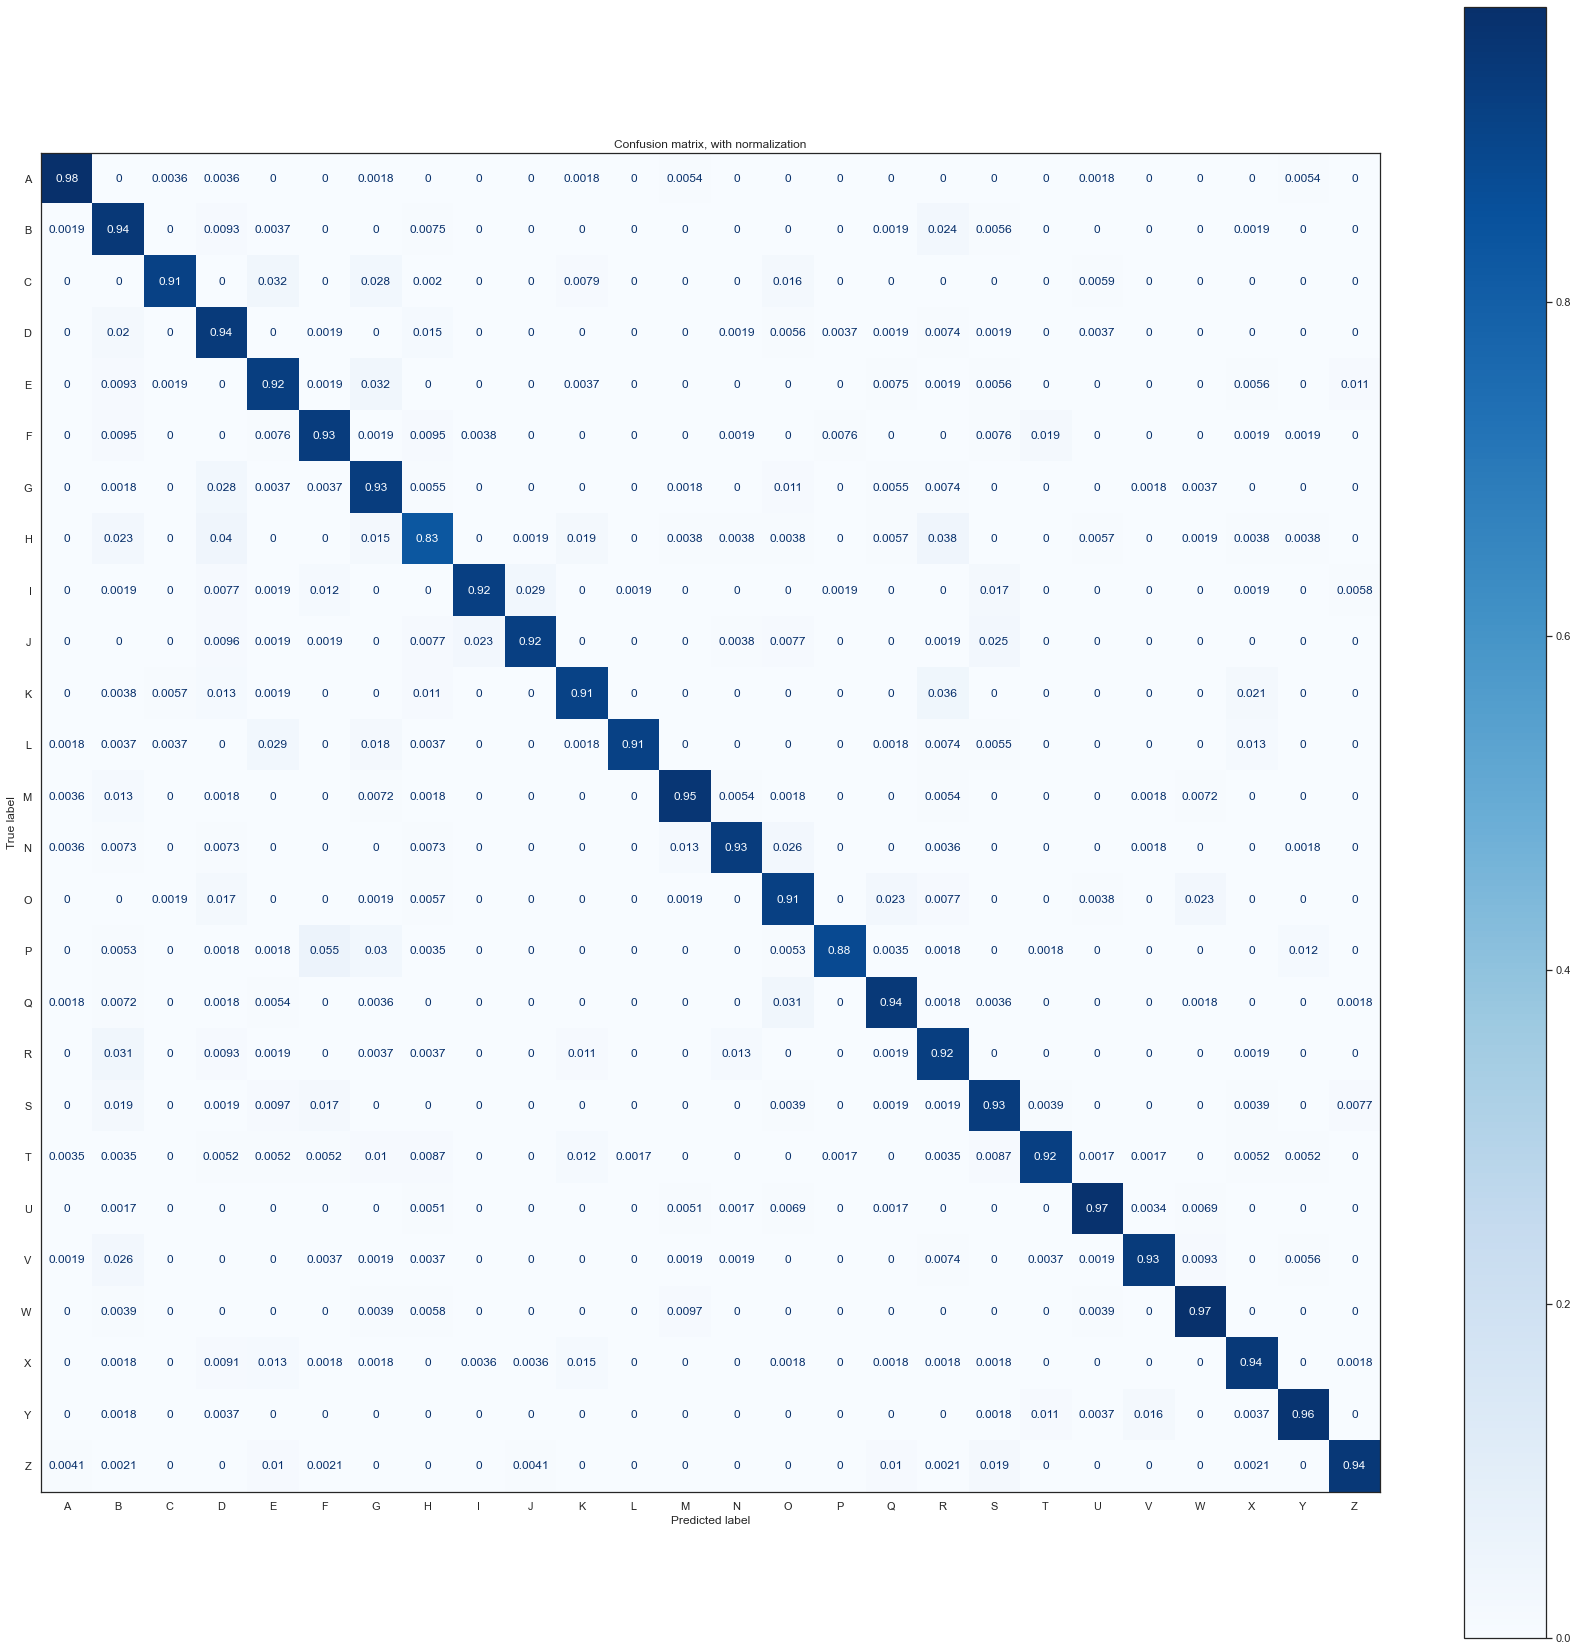

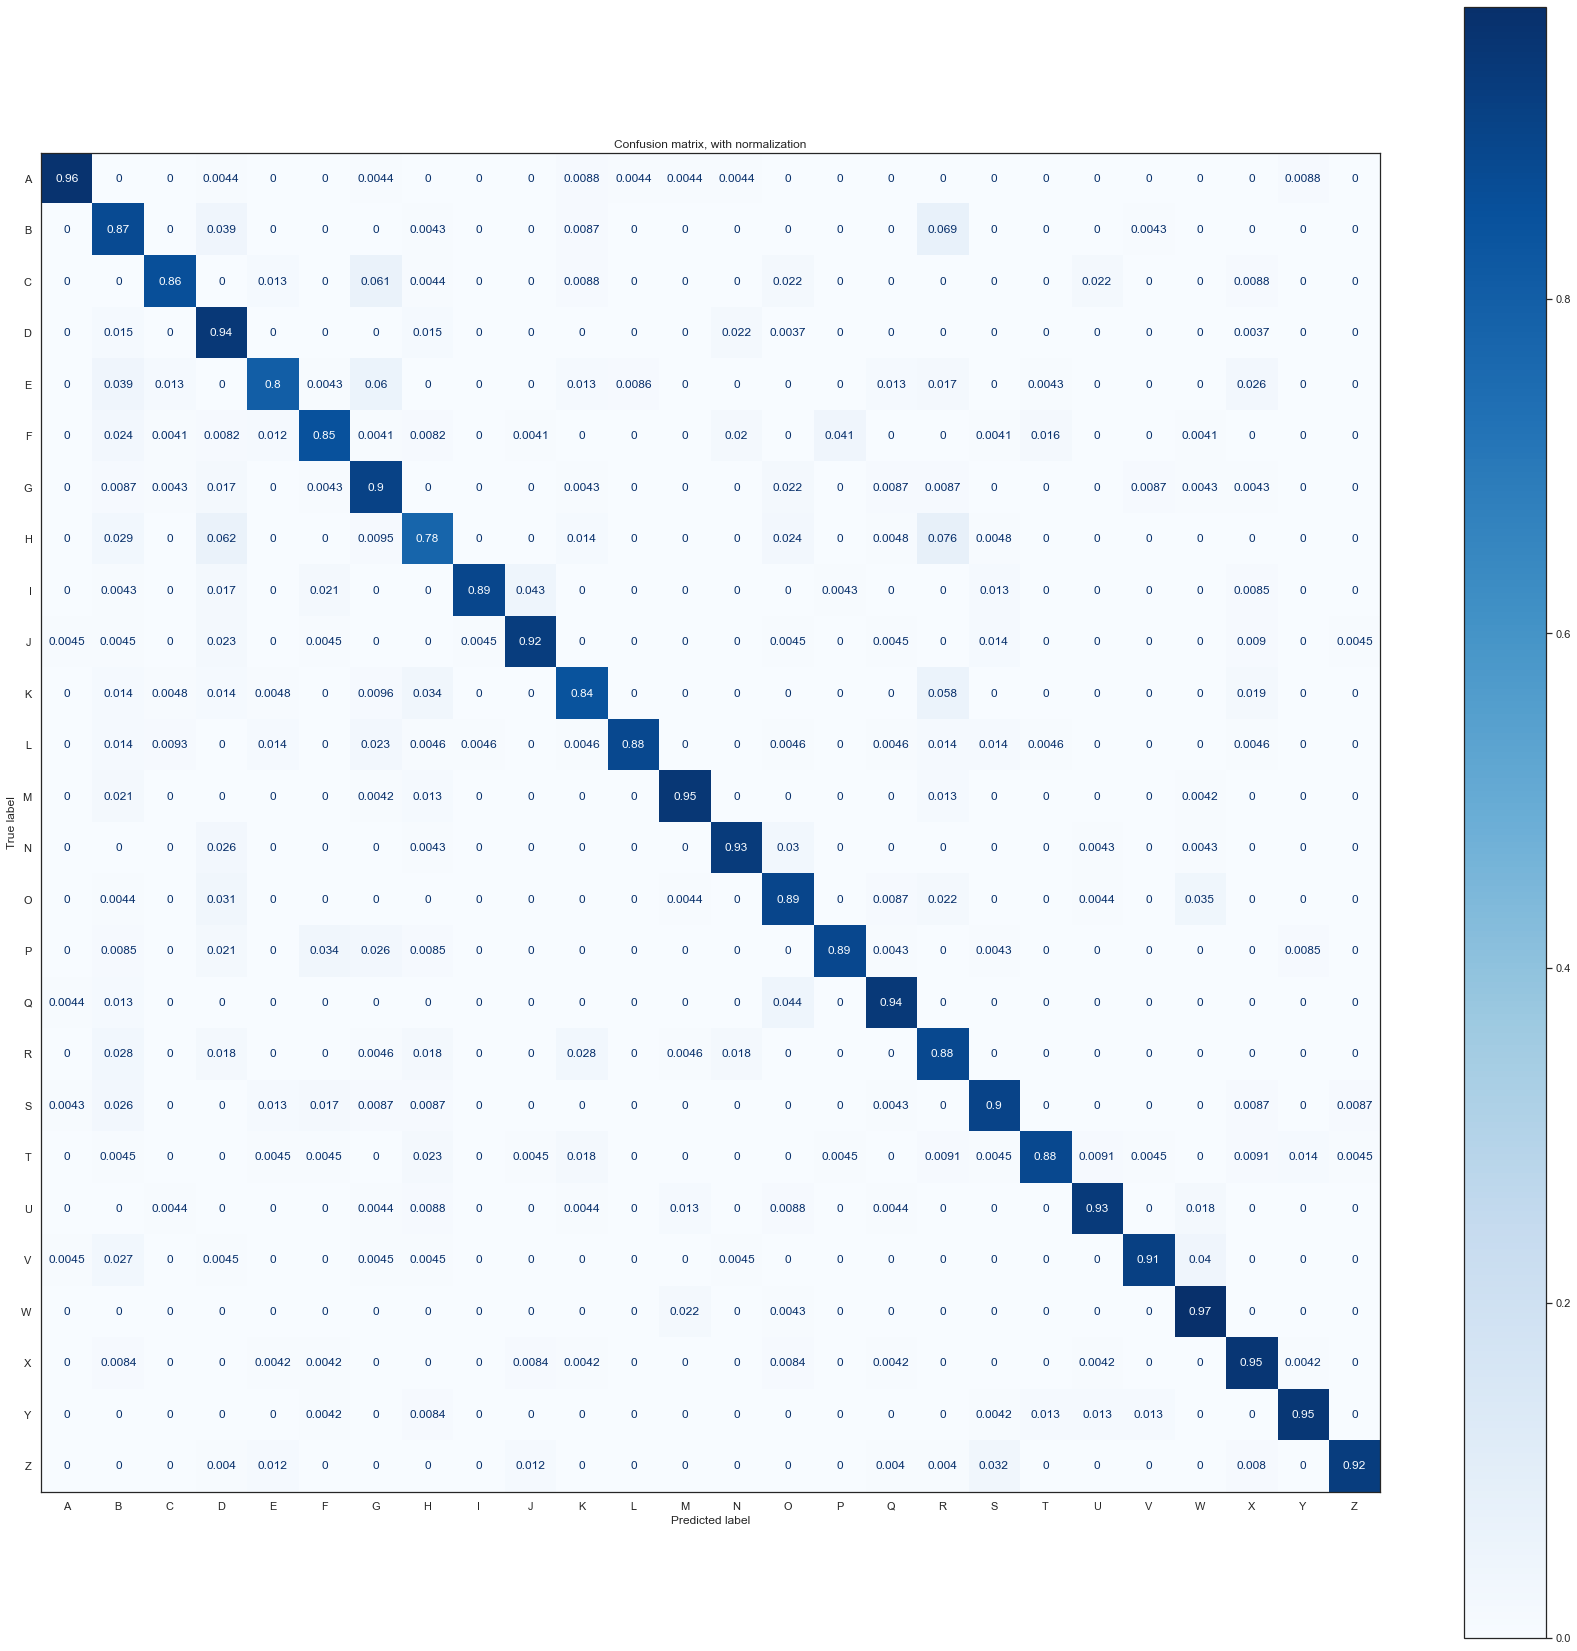

In [7]:
evaluation_metrics(svc)

for X, Y in [(X_train, Y_train), (X_test, Y_test)]:
    confusion_matrix_plotter(svc, X, Y, df_test['lettr'])

    
# ROC curves are typically used in binary classification to study the output of a classifier. 
# In order to extend ROC curve and ROC area to multi-label classification, it is necessary to binarize the output. 
# One ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix 
# as a binary prediction (micro-averaging).

### Using Grid Search
#### to find optimal hyper parameters

In [8]:
# the argument which helped us a lot was 'decision_function_shape='ovo' '
# I fine tuned these parameters a lot to get 92% F1
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'kernel': ['poly']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf'], 'decision_function_shape': ['ovo']},
 ]

# instantiate a grid search
gr = GridSearchCV(SVC(random_state=12),
                  param_grid=param_grid,
                  scoring='f1_weighted',
                  n_jobs=-1)

# use cross-validation to fine tune hyperparameters
# since cross validation (and/or kfold) is for small datasets
# we are better of using a simple validation set instead
cross_score = cross_val(gr, X_train, Y_train)

print(f"{'-' * 50}\n{cross_score.mean(): 0.2f} accuracy with a standard deviation of {cross_score.std(): 0.2f}")

--------------------------------------------------
 0.92 accuracy with a standard deviation of  0.00


In [9]:
gr = gr.fit(X_train, Y_train)

print('Best Criterion:', *[i for i in gr.best_estimator_.get_params().items()], sep="\n")
print()

Best Criterion:
('C', 10)
('break_ties', False)
('cache_size', 200)
('class_weight', None)
('coef0', 0.0)
('decision_function_shape', 'ovr')
('degree', 3)
('gamma', 'scale')
('kernel', 'poly')
('max_iter', -1)
('probability', False)
('random_state', 12)
('shrinking', True)
('tol', 0.001)
('verbose', False)



### Predict & Validate our model

micro     macro  weighted
train set accuracy   0.992486  0.992486  0.992486
          precision  0.992486  0.992459  0.992495
          recall     0.992486  0.992415  0.992486
          f1         0.992486  0.992430  0.992484
          MSE        0.540718  0.540718  0.540718
test set  accuracy   0.919699  0.919699  0.919699
          precision  0.919699  0.920297  0.920750
          recall     0.919699  0.919188  0.919699
          f1         0.919699  0.919264  0.919747
          MSE        8.405342  8.405342  8.405342

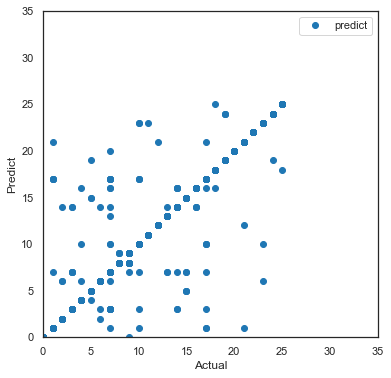

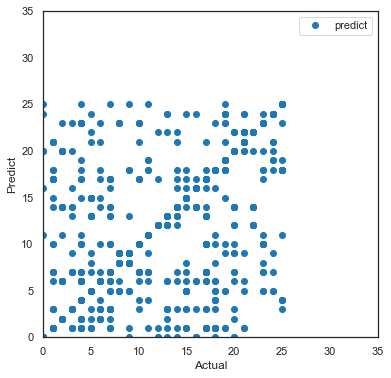

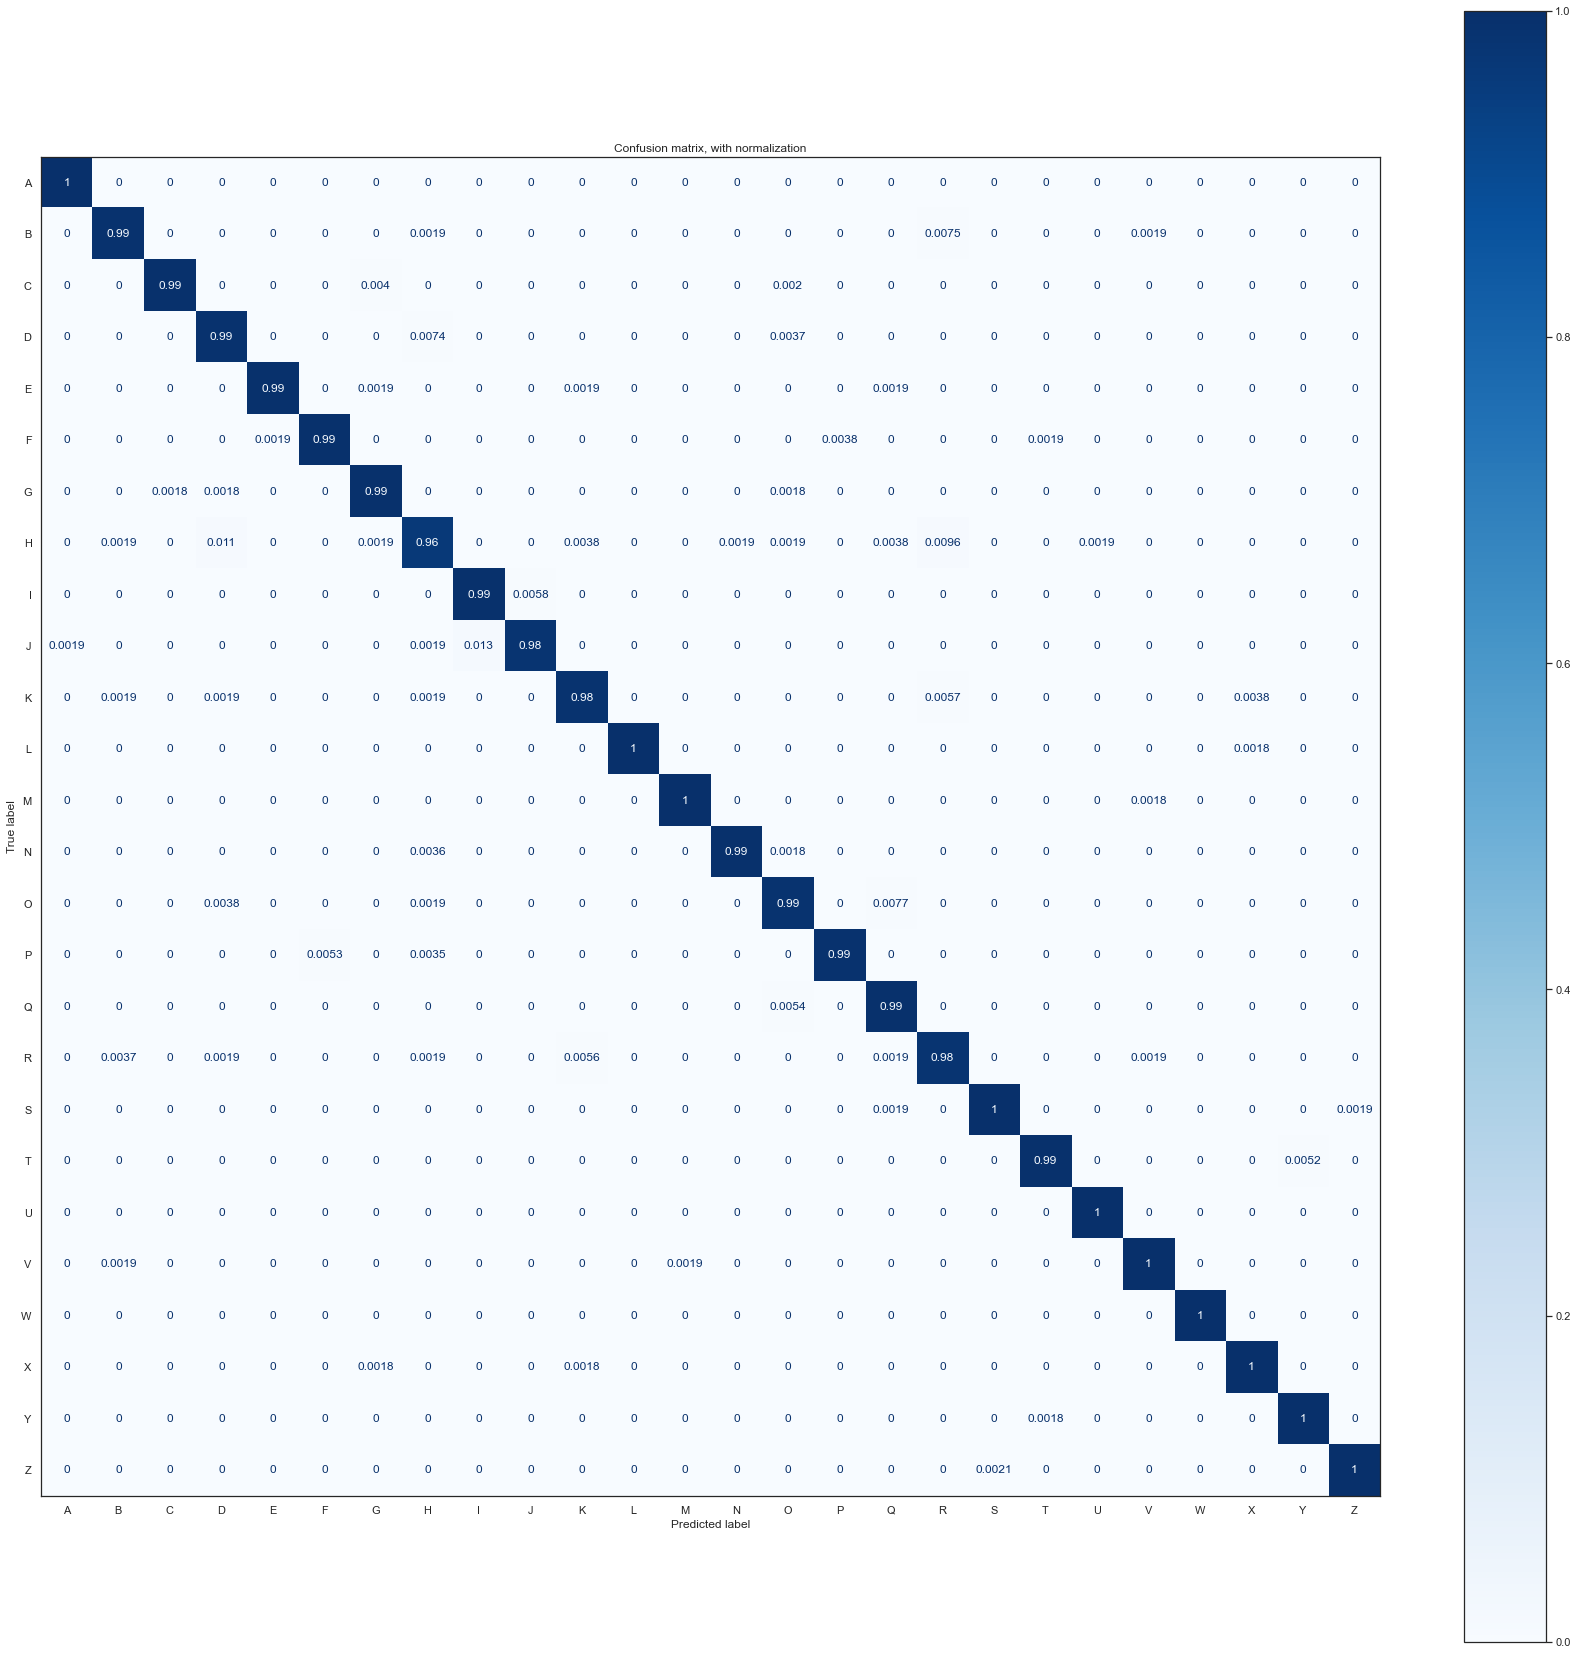

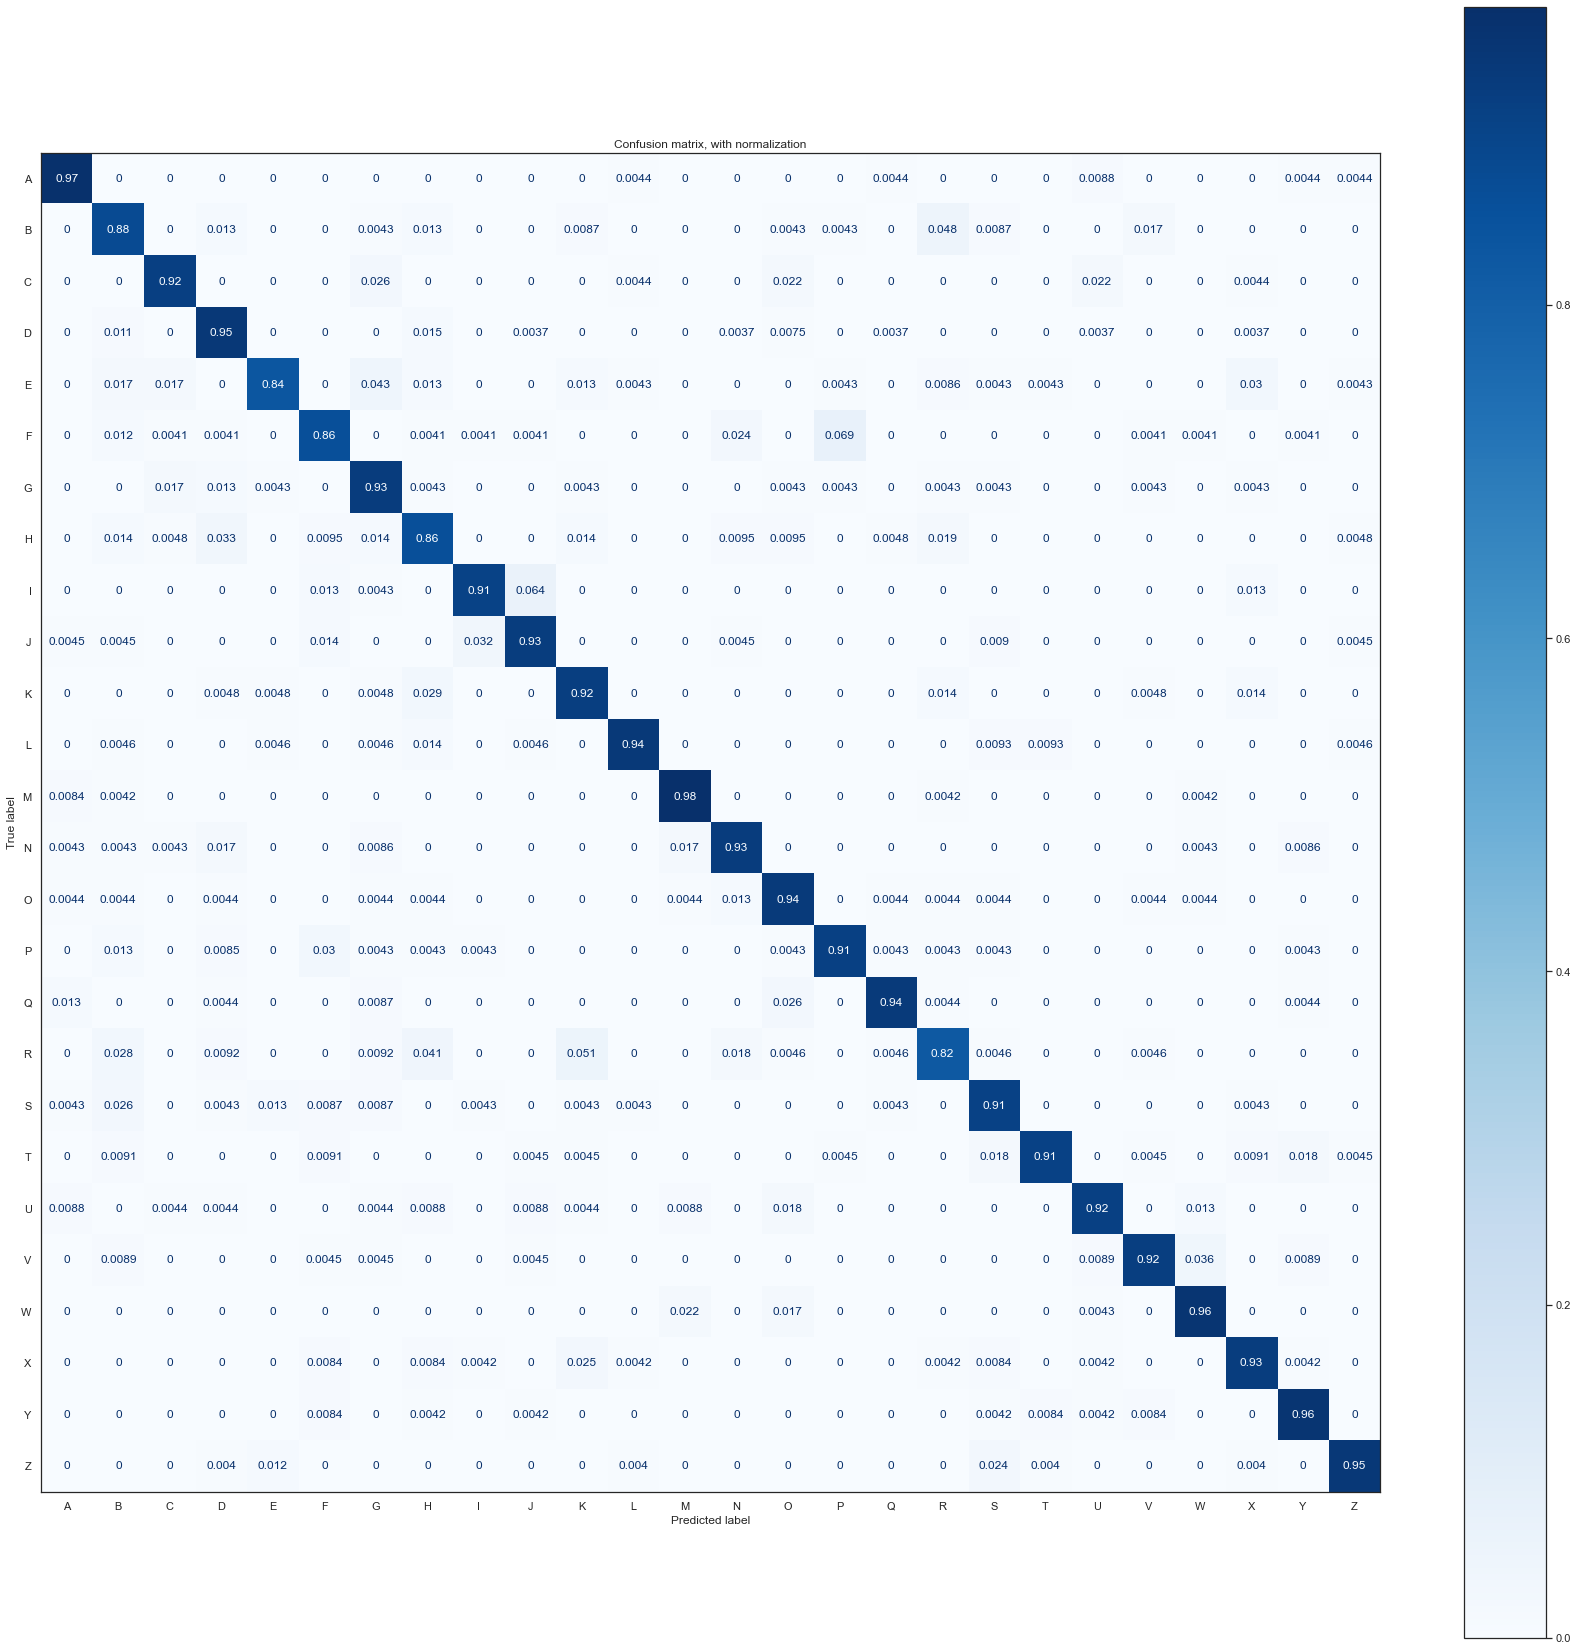

In [10]:
evaluation_metrics(gr)

for X, Y in [(X_train, Y_train), (X_test, Y_test)]:
    confusion_matrix_plotter(gr, X, Y, df_test['lettr'])

### Final fine-tune of the model (to mitigate overfitting)

In [30]:
# svc = SVC(random_state=12, C=1, kernel='poly')  # cross_val: 0.92 little overfitting
svc = SVC(random_state=12, C=2, kernel='poly')  # cross_val: 0.93 little overfitting
# svc = SVC(random_state=12, C=5, kernel='poly')  # cross_val: 0.93 but overfitted

# use cross-validation to fine tune hyperparameters
cross_score = cross_val(svc, X_train, Y_train)

print(f"{'-' * 50}\n{cross_score.mean(): 0.2f} accuracy with a standard deviation of {cross_score.std(): 0.2f}")

--------------------------------------------------
 0.93 accuracy with a standard deviation of  0.00


In [31]:
svc = svc.fit(X_train, Y_train)

display(svc.get_params())

{'C': 2,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': 12,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

micro     macro  weighted
train set accuracy   0.978675  0.978675  0.978675
          precision  0.978675  0.978766  0.978836
          recall     0.978675  0.978546  0.978675
          f1         0.978675  0.978576  0.978676
          MSE        1.974739  1.974739  1.974739
test set  accuracy   0.917696  0.917696  0.917696
          precision  0.917696  0.918564  0.918833
          recall     0.917696  0.917407  0.917696
          f1         0.917696  0.917554  0.917827
          MSE        8.462938  8.462938  8.462938

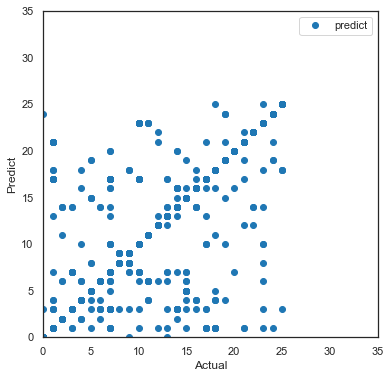

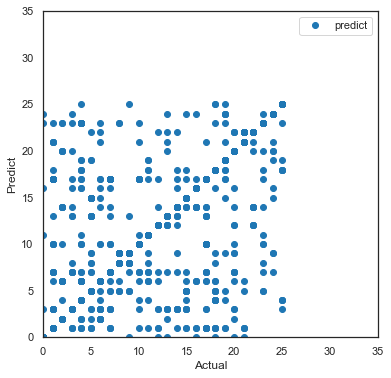

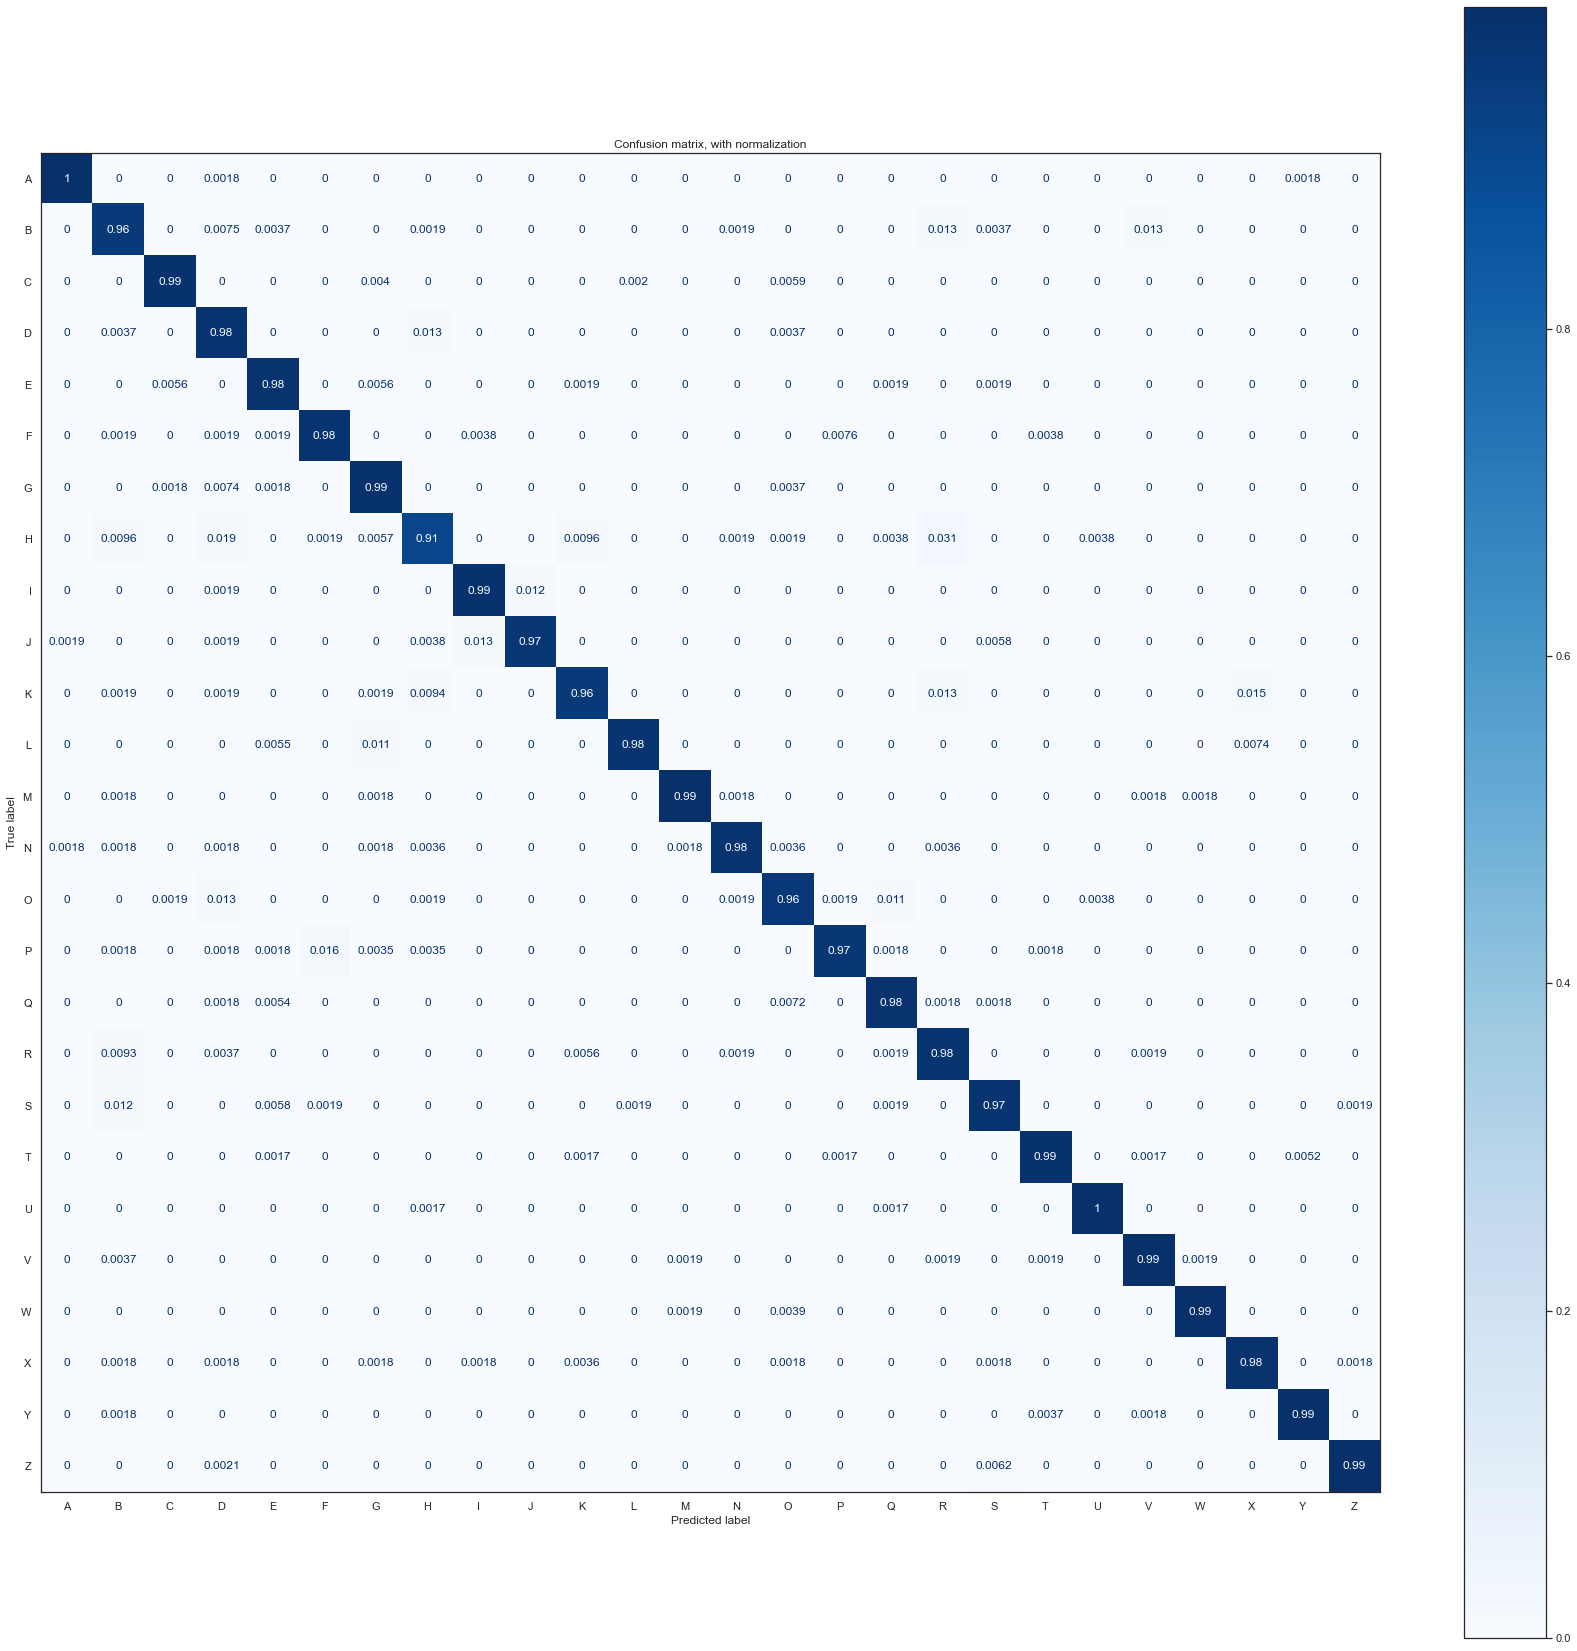

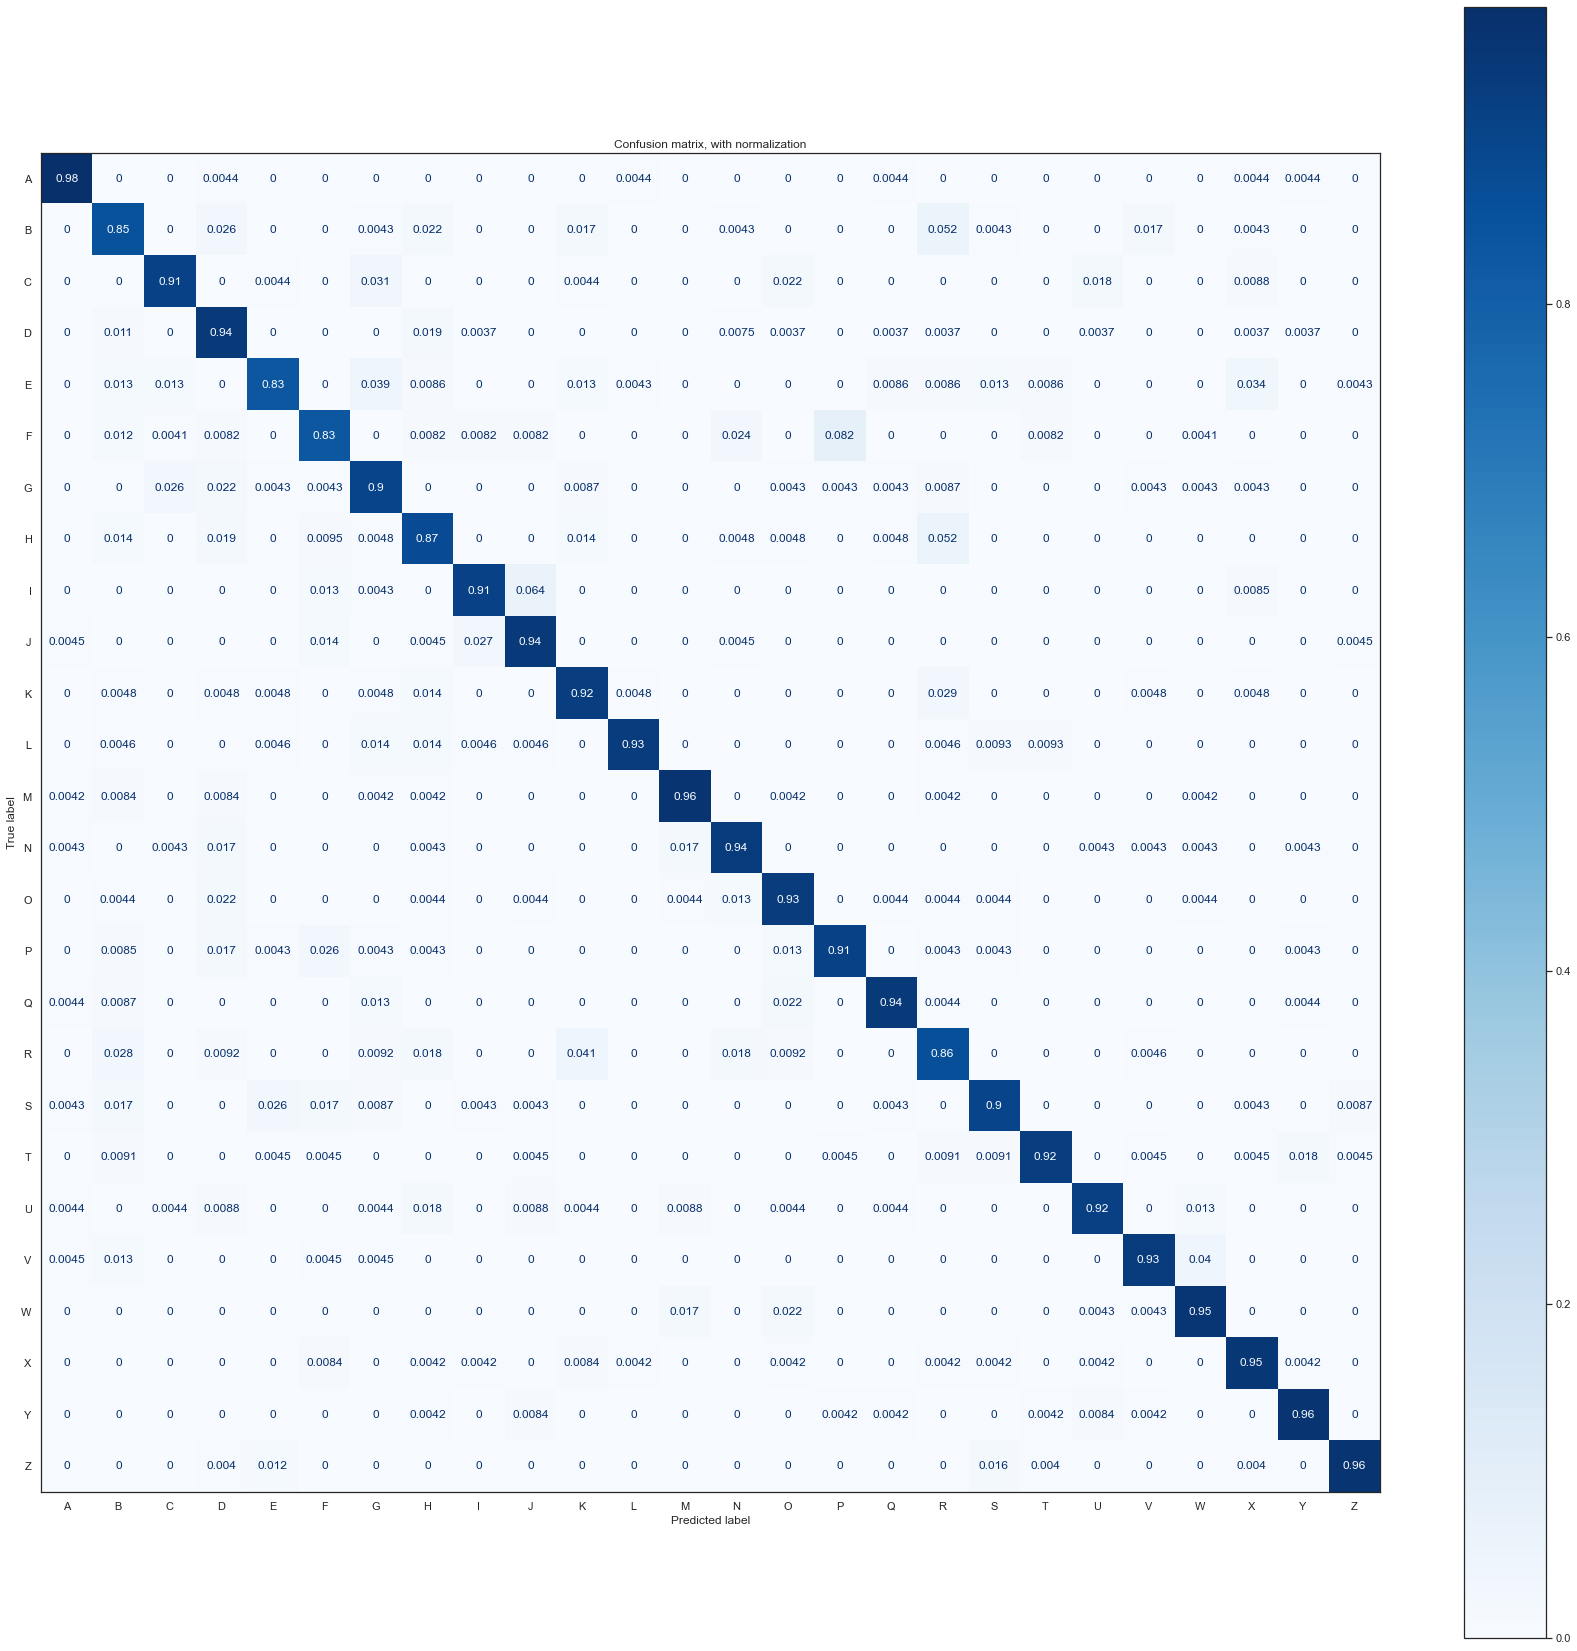

In [32]:
evaluation_metrics(svc)

for X, Y in [(X_train, Y_train), (X_test, Y_test)]:
    confusion_matrix_plotter(svc, X, Y, df_test['lettr'])

    
# ROC curves are typically used in binary classification to study the output of a classifier. 
# In order to extend ROC curve and ROC area to multi-label classification, it is necessary to binarize the output. 
# One ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix 
# as a binary prediction (micro-averaging).